#### Ejercicio 1: ¿Como podemos evaluar funciones en matrices? Hint: ¿que operaciones sabemos que estan bien definidas sobre matrices?

Dada una matriz D de la forma

$$ D = diag(\lambda_{1},...,\lambda_{k}) $$

Entonces

$$ D^{2} = diag(\lambda^{2}_{1},...,\lambda^{2}_{k}) $$

$$.$$
$$.$$
$$.$$

$$ D^{n} = diag(\lambda^{n}_{1},...,\lambda^{n}_{k}) $$

Por lo cual, evaluar la matriz D en una función se puede realizar de la siguiente manera

$$f(D)= \sum_{n} C_{n}D^{n} = \sum_{n} C_{n}diag(\lambda^{n}_{1},...,\lambda^{n}_{k}) = diag(\sum_{n} C_{n}\lambda^{n}_{1},...,\sum_{n} C_{n}\lambda^{n}_{k}) $$ 

Se sigue entonces que

$$f(D) = diag(f(\lambda_{1}),...,f(\lambda_{k}))$$

De manera general, si 

$$A = WDW^{-1}$$ donde $D = diag(\lambda_{1},...,\lambda_{k})$ y W es la matriz de eigenvectores de A.

Entonces

$$f(A) = Wf(D)W^{-1}$$

Prueba

$$f(A) = f(WDW^{-1}) = f(D)= \sum_{n} C_{n}A^{n} = f(D)= \sum_{n} C_{n}WD^{n}W^{-1} = W(\sum_{n} C_{n}D^{n})W^{-1} = Wf(D)W^{-1} $$



#### Ejercicio 2: ¿Como se define una matriz simétrica?

Sea una matriz A, decimos que A es simétrica si sus elementos son de la forma $a_{ij}=a_{ji}$. Esto es, A es simétrica si A es igual a su transpuesta $A=A^{t}$

#### Ejercicio 3: ¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?

Dada A una matriz cuadrada, esta se puede descomponer en una parte simétrica y una antisimétrica como sigue

$$ A = \frac{(A + A^{t})}{2} + \frac{(A - A^{t})}{2}$$ 

Por lo cual, se puede construir la matriz simétrica de A tomando sólo la parte simétrica, es decir 

$$A = \frac{(A + A^{t})}{2} $$

#### Ejercicio 4: Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice: $$A=\left(\begin{array}{cc} -1 & 1\\ -1 & -1 \end{array} \right).$$

In [1]:
A = [-1 1; -1 -1] #Se define la matriz A.

2×2 Array{Int64,2}:
 -1   1
 -1  -1

In [3]:
vals = eigvals(A) #Se obtienen los eigenvalores de la matriz A.

2-element Array{Complex{Float64},1}:
 -1.0+1.0im
 -1.0-1.0im

In [5]:
D = diagm(exp.(vals)) #Se define la matriz cuyos elementos de la diagonal son
#exponenciales evaluadas en los eigenvalores anteriormente calculados.

2×2 Array{Complex{Float64},2}:
 0.198766+0.30956im       0.0+0.0im    
      0.0+0.0im      0.198766-0.30956im

In [6]:
W = eigvecs(A) #Se obtienen los eigenvectores de A.

2×2 Array{Complex{Float64},2}:
 0.707107+0.0im       0.707107-0.0im     
      0.0+0.707107im       0.0-0.707107im

In [9]:
expA = W * D * inv(W) #Se obtiene la función exponencial valuada en la matriz A.

2×2 Array{Complex{Float64},2}:
 0.198766+0.0im   0.30956+0.0im
 -0.30956+0.0im  0.198766+0.0im

In [10]:
f(x,t)=(expA)*[x[1],x[2]] #Se define una función para construir el propagador.

f (generic function with 1 method)

In [12]:
function metodo_euler_vec(f,list,x0) #Se crea una función que implementa el método de Euler vectorial. 
    #Dicha función toma como entradas la función, una lista y el valor inicial x0.
     x = x0 #Se asigna a x el valor inicial x0.
     h = list[2]-list[1] #Se escribe el paso de h.
     listx = [] #Se crea un vector vacío.
     for i in 2:length(list)
        t = i*h #Se calculan los valores de t.
        x = x + f(x,t)*h #Se realiza la operación del método de Euler.
        push!(listx,x) #Se guarda en listx los valores de x que se obtienen del método de Euler.
     end
     return listx #Se regresa la lista de x.
end

metodo_euler_vec (generic function with 1 method)

In [13]:
list = 0:0.01:100 #Se crea una lista de tiempo.
vec = metodo_euler_vec(f,list,[1,0]) #Se evalúa para una condición inicial.

10000-element Array{Any,1}:
 Complex{Float64}[1.00199+0.0im, -0.0030956+0.0im] 
 Complex{Float64}[1.00397+0.0im, -0.0062035+0.0im] 
 Complex{Float64}[1.00595+0.0im, -0.00932372+0.0im]
 Complex{Float64}[1.00792+0.0im, -0.0124563+0.0im] 
 Complex{Float64}[1.00988+0.0im, -0.0156011+0.0im] 
 Complex{Float64}[1.01184+0.0im, -0.0187583+0.0im] 
 Complex{Float64}[1.01379+0.0im, -0.0219279+0.0im] 
 Complex{Float64}[1.01574+0.0im, -0.0251097+0.0im] 
 Complex{Float64}[1.01768+0.0im, -0.028304+0.0im]  
 Complex{Float64}[1.01962+0.0im, -0.0315106+0.0im] 
 Complex{Float64}[1.02155+0.0im, -0.0347295+0.0im] 
 Complex{Float64}[1.02347+0.0im, -0.0379609+0.0im] 
 Complex{Float64}[1.02539+0.0im, -0.0412046+0.0im] 
 ⋮                                                 
 Complex{Float64}[3.6661e8+0.0im, 2.27518e8+0.0im] 
 Complex{Float64}[3.68043e8+0.0im, 2.26836e8+0.0im]
 Complex{Float64}[3.69477e8+0.0im, 2.26147e8+0.0im]
 Complex{Float64}[3.70911e8+0.0im, 2.25453e8+0.0im]
 Complex{Float64}[3.72346e8+0.0im, 2

In [14]:
listx1 = map(x->x[1],vec) #Guarda  los elementos x[1] de cada elemeno de vec en listx1.
listx2 = map(x->x[2],vec) #Guarda  los elementos x[2] de cada elemeno de vec en listx2.

10000-element Array{Complex{Float64},1}:
  -0.0030956+0.0im
  -0.0062035+0.0im
 -0.00932372+0.0im
  -0.0124563+0.0im
  -0.0156011+0.0im
  -0.0187583+0.0im
  -0.0219279+0.0im
  -0.0251097+0.0im
   -0.028304+0.0im
  -0.0315106+0.0im
  -0.0347295+0.0im
  -0.0379609+0.0im
  -0.0412046+0.0im
            ⋮     
   2.27518e8+0.0im
   2.26836e8+0.0im
   2.26147e8+0.0im
   2.25453e8+0.0im
   2.24753e8+0.0im
   2.24047e8+0.0im
   2.23335e8+0.0im
   2.22618e8+0.0im
   2.21894e8+0.0im
   2.21165e8+0.0im
   2.20429e8+0.0im
   2.19688e8+0.0im

In [15]:
using PyPlot

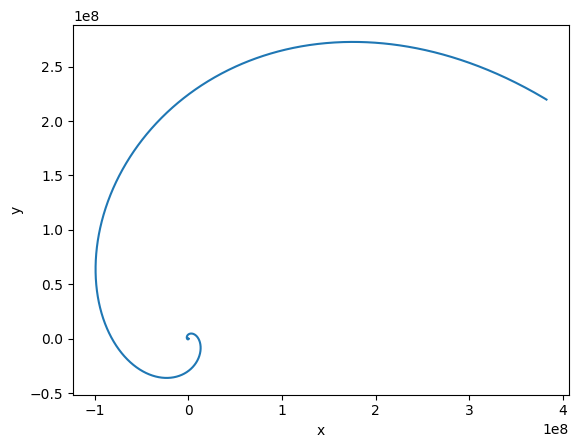

PyObject <matplotlib.text.Text object at 0x000000002B3B3160>

In [16]:
#Se grafica en el espacio fase.
plot(listx1,listx2)
xlabel("x")
ylabel("y")